In [33]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
from IPython.display import display
from sklearn.model_selection import (GridSearchCV, ParameterGrid,
                                     RandomizedSearchCV)
from xgboost import XGBClassifier
import pickle

from tools import Modelisation, columns_cat, columns_quant, datasets

t = time.time()

In [2]:
df = pd.read_csv('data/df_train_prepro.csv').sample(frac=1)
df.shape

(1610494, 48)

**Définition des variables quantitatives, des variables catégorielles et des datasets :**

In [3]:
print("Columns_quant :")
display(columns_quant)
print("\nColumns_cat :")
display(columns_cat)

X_quant, _, X_cat, _, X_quant_cat, _, y = datasets(df)

Columns_quant :


['contextid',
 'campaignctrlast24h',
 'dayssincelastvisitdouble',
 'ltf_nbglobaldisplay_4w',
 'ltf_nbpartnerdisplayssincelastclick',
 'ltf_nbpartnerdisplay_90d',
 'ltf_nbpartnerclick_90d',
 'ltf_nbpartnersales_90d',
 'nbdayssincelastclick',
 'nbdisplay_1hour',
 'nbdisplayglobalapprox_1d_sum_xdevice',
 'display_size',
 'zonecostineuro']


Columns_cat :


['display_env',
 'target_env',
 'campaignscenario',
 'campaignvertical',
 'is_interstitial',
 'device_type',
 'hour',
 'weekday']


Nombre de variables pour X_quant : 13



Index(['contextid', 'campaignctrlast24h', 'dayssincelastvisitdouble',
       'ltf_nbglobaldisplay_4w', 'ltf_nbpartnerdisplayssincelastclick',
       'ltf_nbpartnerdisplay_90d', 'ltf_nbpartnerclick_90d',
       'ltf_nbpartnersales_90d', 'nbdayssincelastclick', 'nbdisplay_1hour',
       'nbdisplayglobalapprox_1d_sum_xdevice', 'display_size',
       'zonecostineuro'],
      dtype='object')


Nombre de variables pour X_cat : 50



Index(['display_env_app_ios', 'display_env_other', 'display_env_web',
       'target_env_2', 'campaignscenario_5', 'campaignscenario_6',
       'campaignscenario_11', 'campaignscenario_12', 'campaignscenario_13',
       'campaignscenario_17', 'campaignvertical_20.0', 'campaignvertical_23.0',
       'campaignvertical_129.0', 'campaignvertical_200002.0',
       'is_interstitial_True', 'device_type_Desktop',
       'device_type_Desktop - Safari', 'device_type_Mobile - Other',
       'device_type_Unknown', 'device_type_iPad', 'device_type_iPhone',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')


Nombre de variables pour X_quant_cat : 63


In [4]:
len(y[y == 0]) / (len(y[y == 1]))

16.552685500043594

# XGBoost
## Variables quantitatives

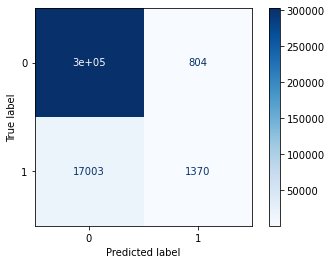

f1 : 0.1334
recall : 0.0746
negative predictive value : 0.9469
precision : 0.6302
roc_auc : 0.8267
Wall time: 30.5 s


In [5]:
%%time
m = Modelisation(X_quant, y, XGBClassifier(n_jobs=-1), scaling=False)
m.show_conf_matrix()
m.show_metrics_score()

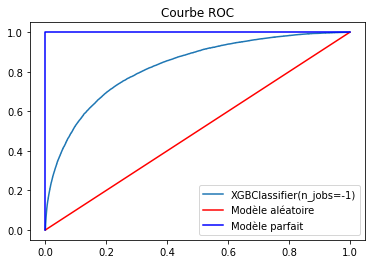

In [6]:
m.show_ROC()

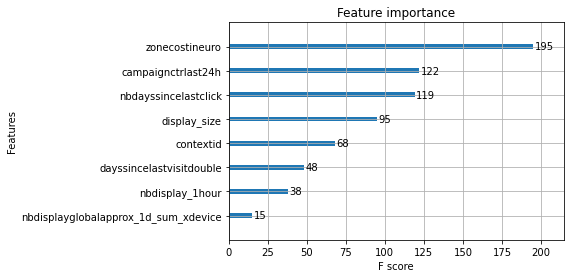

In [7]:
m.plot_importance()

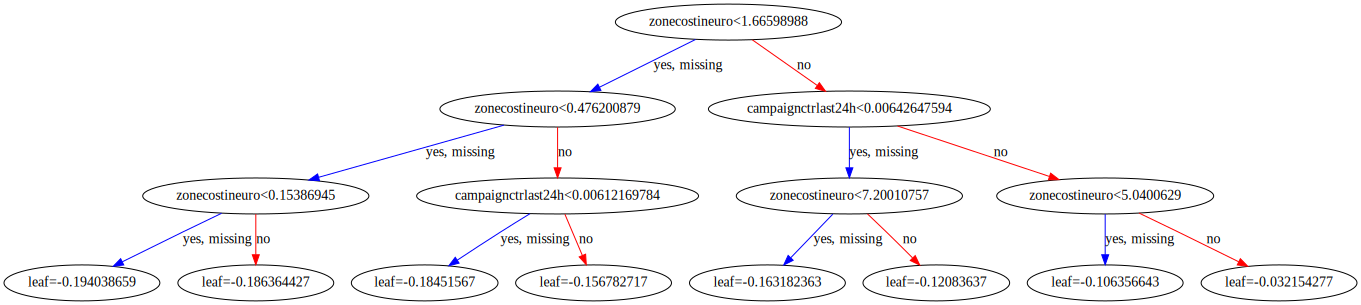

In [8]:
m.show_graph()

## Categorical variables

In [9]:
# Nombre de valeurs distinctes
for column in columns_cat:
    print(f"{column} : {len(set(df[column]))}")

display_env : 4
target_env : 2
campaignscenario : 7
campaignvertical : 34
is_interstitial : 3
device_type : 7
hour : 24
weekday : 7


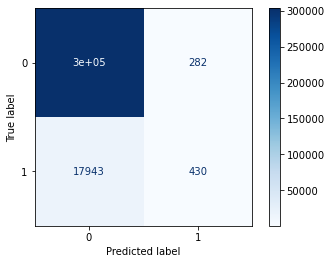

f1 : 0.0451
recall : 0.0234
negative predictive value : 0.9442
precision : 0.6039
roc_auc : 0.6923
Wall time: 45.6 s


In [10]:
%%time
m = Modelisation(X_cat, y, XGBClassifier(n_jobs=-1), scaling=False)
m.show_conf_matrix()
m.show_metrics_score()

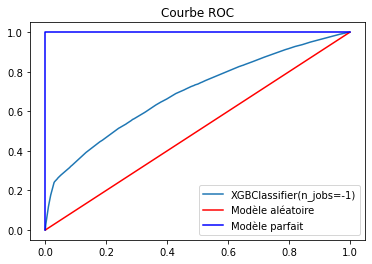

In [11]:
m.show_ROC()

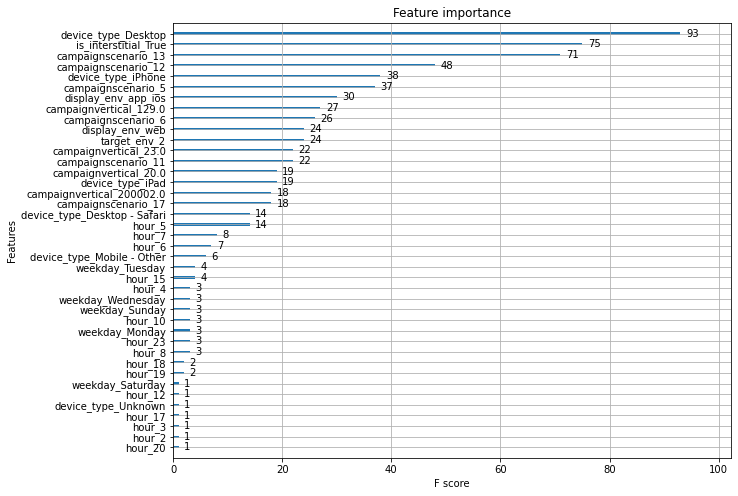

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
m.plot_importance(ax=ax)

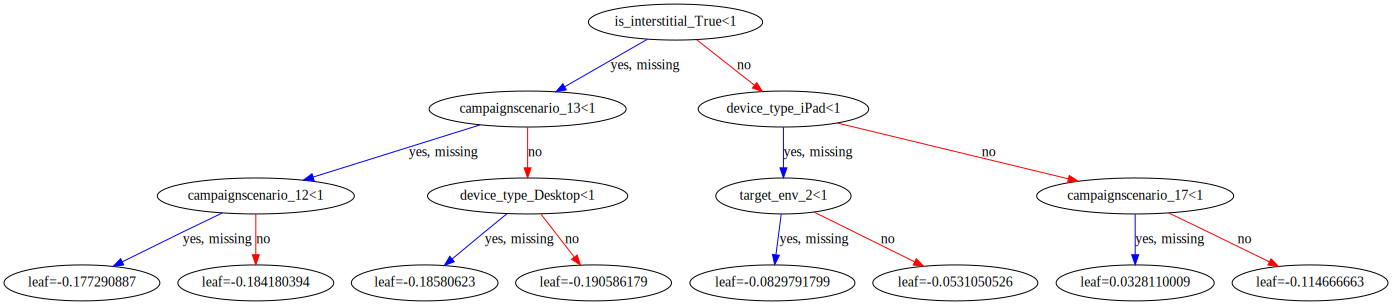

In [13]:
m.show_graph()

## Quantitative + categorical

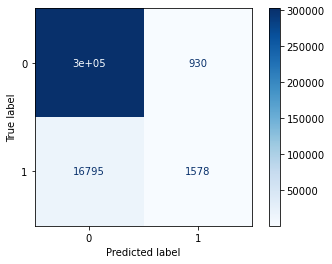

f1 : 0.1511
recall : 0.0859
negative predictive value : 0.9474
precision : 0.6292
roc_auc : 0.8340
Wall time: 1min 4s


In [14]:
%%time
m = Modelisation(X_quant_cat, y, XGBClassifier(n_jobs=-1), scaling=False)
m.show_conf_matrix()
m.show_metrics_score()

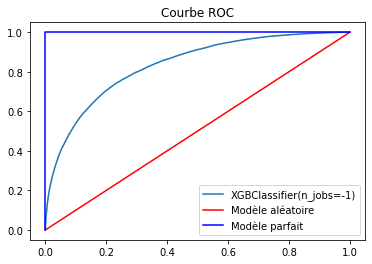

In [15]:
m.show_ROC()

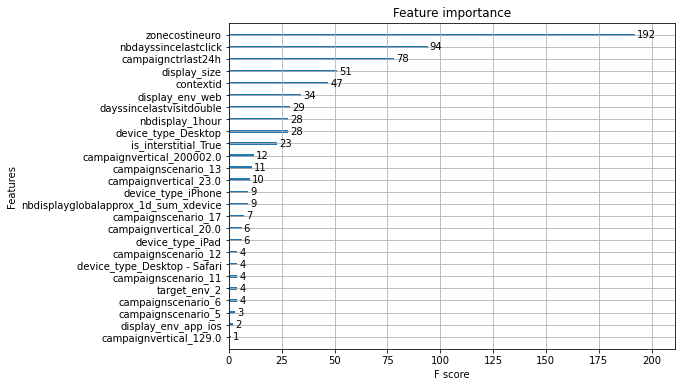

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
m.plot_importance(ax=ax)

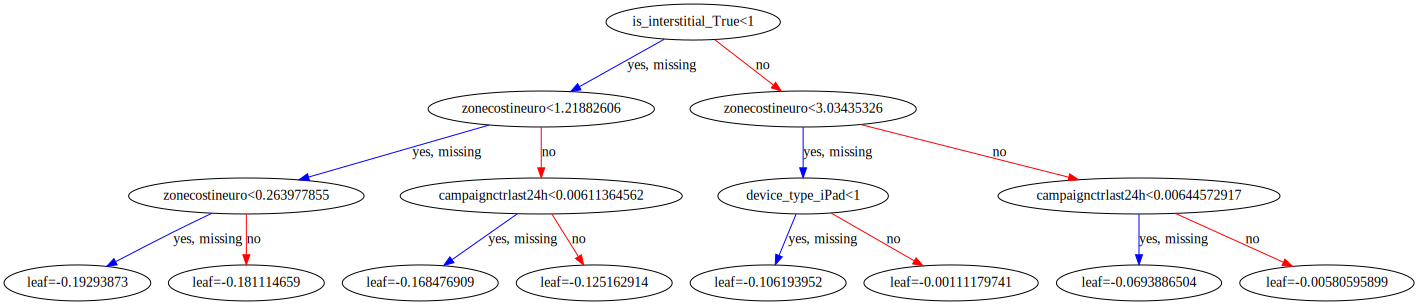

In [17]:
m.show_graph()

## Tuning des hyperparamètres avec GridSearchCV

On calcule le GridSearchCV sur un dataset plus petit pour avoir un temps de calcul raisonnable.

In [18]:
df_small = pd.read_csv('data/df_train_prepro.csv').sample(frac=0.01)
df_small.shape

(16105, 48)

In [19]:
_, _, _, _, X_quant_cat_small, _, y_small = datasets(df_small)


Nombre de variables pour X_quant : 13



Index(['contextid', 'campaignctrlast24h', 'dayssincelastvisitdouble',
       'ltf_nbglobaldisplay_4w', 'ltf_nbpartnerdisplayssincelastclick',
       'ltf_nbpartnerdisplay_90d', 'ltf_nbpartnerclick_90d',
       'ltf_nbpartnersales_90d', 'nbdayssincelastclick', 'nbdisplay_1hour',
       'nbdisplayglobalapprox_1d_sum_xdevice', 'display_size',
       'zonecostineuro'],
      dtype='object')


Nombre de variables pour X_cat : 50



Index(['display_env_app_ios', 'display_env_other', 'display_env_web',
       'target_env_2', 'campaignscenario_5', 'campaignscenario_6',
       'campaignscenario_11', 'campaignscenario_12', 'campaignscenario_13',
       'campaignscenario_17', 'campaignvertical_20.0', 'campaignvertical_23.0',
       'campaignvertical_129.0', 'campaignvertical_200002.0',
       'is_interstitial_True', 'device_type_Desktop',
       'device_type_Desktop - Safari', 'device_type_Mobile - Other',
       'device_type_Unknown', 'device_type_iPad', 'device_type_iPhone',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')


Nombre de variables pour X_quant_cat : 63


In [20]:
params = {
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'max_depth': [3, 6, 9, 12],
        'min_child_weight': [1, 5, 10, 15],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
    
        'scale_pos_weight': [1, 16.5]   # A typical value to consider: sum(negative instances) / sum(positive instances)
        }

In [21]:
grid = ParameterGrid(params)
print (f"Nombre total de combinaisons de paramètres : {len(grid)}")

Nombre total de combinaisons de paramètres : 11520


In [22]:
%%time
model = XGBClassifier(booster='gbtree', objective='binary:logistic', n_jobs=1)

random_search = RandomizedSearchCV(model, params, n_iter=100, scoring=['f1', 'recall'], refit=False, n_jobs=-1, cv=5, verbose=2)
# random_search = GridSearchCV(model, params, scoring=['f1', 'recall'], refit=False, n_jobs=1, cv=5, verbose=2)

random_search.fit(X_quant_cat_small, y_small)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Wall time: 7min 40s


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                          0.4, 0.6, 0.8, 1],
                                        'max_depth': [3, 6, 9, 12],
                                        'min_child_weight': [1, 5, 10, 15],
                                        'scale_pos_weight': [1, 16.5],
                                        'subsample': [0.6, 0.8, 1.0]},
                   refit=False, scoring=['f1', 'recall'], verbose=2)

In [43]:
resul = pd.DataFrame(random_search.cv_results_)

Sauvegarde des résultats

In [44]:
pickle.dump(resul, open('xgboost_cv_results.pkl', 'wb'))

Restauration des résultats

In [45]:
resul = pickle.load(open('xgboost_cv_results.pkl', 'rb'))

In [46]:
resul.loc[:, ~resul.columns.str.startswith('split')].head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_scale_pos_weight,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,mean_test_f1,std_test_f1,rank_test_f1,mean_test_recall,std_test_recall,rank_test_recall
0,6.151747,0.065209,0.047274,0.001739,0.8,1,15,9,1,1,0.6,"{'subsample': 0.8, 'scale_pos_weight': 1, 'min...",0.215561,0.027818,58,0.169824,0.024079,49
1,6.625878,0.131745,0.032713,0.001163,1.0,1,15,6,0.01,0.5,1.0,"{'subsample': 1.0, 'scale_pos_weight': 1, 'min...",0.125555,0.036226,88,0.071514,0.022146,87
2,9.403051,0.037927,0.037699,0.000977,0.6,1,1,9,0.6,5,0.8,"{'subsample': 0.6, 'scale_pos_weight': 1, 'min...",0.210315,0.025427,65,0.164869,0.021764,55
3,6.861050,0.113652,0.030319,0.000489,1.0,1,10,12,0.001,2,0.8,"{'subsample': 1.0, 'scale_pos_weight': 1, 'min...",0.109414,0.032845,90,0.060564,0.019908,90
4,6.787446,0.048342,0.056050,0.001596,0.8,16.5,15,9,0.1,5,0.6,"{'subsample': 0.8, 'scale_pos_weight': 16.5, '...",0.325696,0.023400,3,0.472691,0.037489,20
5,6.872220,0.200656,0.028325,0.001353,1.0,1,5,9,0.001,5,0.8,"{'subsample': 1.0, 'scale_pos_weight': 1, 'min...",0.105187,0.031442,91,0.058598,0.018943,91
6,9.430378,0.187953,0.079189,0.002491,1.0,16.5,1,12,0.01,1,0.6,"{'subsample': 1.0, 'scale_pos_weight': 16.5, '...",0.322234,0.025540,5,0.361475,0.028405,24
7,3.911339,0.040263,0.027726,0.000747,0.6,16.5,1,3,0.4,1.5,1.0,"{'subsample': 0.6, 'scale_pos_weight': 16.5, '...",0.272278,0.010241,23,0.595823,0.027418,13
8,6.747353,0.103946,0.025731,0.000399,0.8,1,15,6,0.01,5,1.0,"{'subsample': 0.8, 'scale_pos_weight': 1, 'min...",0.102916,0.022617,93,0.056613,0.013191,92
9,8.224603,0.165979,0.070212,0.000489,1.0,16.5,15,12,0.001,1,0.6,"{'subsample': 1.0, 'scale_pos_weight': 16.5, '...",0.324835,0.012696,4,0.541229,0.009832,16


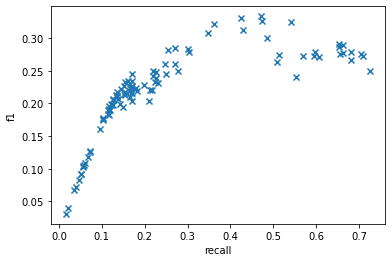

In [49]:
plt.scatter(resul['mean_test_recall'], resul['mean_test_f1'], marker='x')
plt.xlabel('recall')
plt.ylabel('f1')
plt.show()

In [26]:
# print('\n Best estimator:')
# print(random_search.best_estimator_)
# print('\n Best hyperparameters:')
# print(random_search.best_params_)
# print('\n Best score:')
# print(random_search.best_score_)

**Paramètres donnant le meilleur recall :**

In [27]:
resul.loc[:, ~resul.columns.str.startswith('split')].sort_values(by='mean_test_recall', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_scale_pos_weight,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,mean_test_f1,std_test_f1,rank_test_f1,mean_test_recall,std_test_recall,rank_test_recall
86,3.787670,0.056211,0.032513,0.001017,0.6,16.5,10,3,0.001,1,0.8,"{'subsample': 0.6, 'scale_pos_weight': 16.5, '...",0.249630,0.014448,30,0.725876,0.038190,1
47,3.594187,0.006476,0.028524,0.000798,0.8,16.5,1,3,0.1,2,1.0,"{'subsample': 0.8, 'scale_pos_weight': 16.5, '...",0.271784,0.007579,24,0.710029,0.011165,2
63,3.054630,0.012383,0.034109,0.000746,0.8,16.5,1,3,0.1,1,0.6,"{'subsample': 0.8, 'scale_pos_weight': 16.5, '...",0.274933,0.008505,20,0.704084,0.017177,3
82,3.280426,0.009678,0.028723,0.000977,1.0,16.5,15,3,0.2,5,1.0,"{'subsample': 1.0, 'scale_pos_weight': 16.5, '...",0.278090,0.010289,17,0.682208,0.030827,4
33,5.849156,0.046086,0.043484,0.001017,1.0,16.5,10,6,0.001,0.5,0.8,"{'subsample': 1.0, 'scale_pos_weight': 16.5, '...",0.266725,0.011743,26,0.680233,0.031288,5


In [28]:
best_params = resul.sort_values(by='mean_test_recall', ascending=False).iloc[0].params
best_params

{'subsample': 0.6,
 'scale_pos_weight': 16.5,
 'min_child_weight': 10,
 'max_depth': 3,
 'learning_rate': 0.001,
 'gamma': 1,
 'colsample_bytree': 0.8}

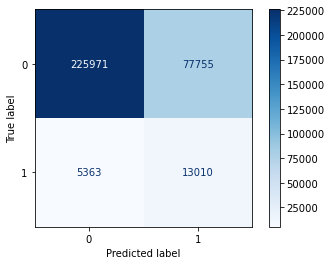

f1 : 0.2384
recall : 0.7081
negative predictive value : 0.9768
precision : 0.1433
roc_auc : 0.8056
Wall time: 1min 4s


In [29]:
%%time
m = Modelisation(X_quant_cat, y, XGBClassifier(**best_params, n_jobs=-1), scaling=False)
m.show_conf_matrix()
m.show_metrics_score()

**Paramètres sauvegardés :**

In [30]:
params = {'colsample_bytree': 1.0, 
          'gamma': 1,
          'min_child_weight': 15,
          'scale_pos_weight': 16.5, 
          'subsample': 0.8}

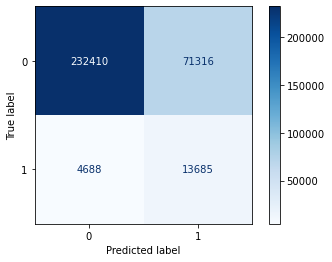

f1 : 0.2648
recall : 0.7448
negative predictive value : 0.9802
precision : 0.1610
roc_auc : 0.8349
Wall time: 1min 10s


In [31]:
%%time
m = Modelisation(X_quant_cat, y, XGBClassifier(**params, n_jobs=-1), scaling=False)
m.show_conf_matrix()
m.show_metrics_score()

In [32]:
print(f"Temps d'exécution total : {time.strftime('%H:%M:%S', time.gmtime(time.time()-t))}")

Temps d'exécution total : 00:13:11
